In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset=pd.read_csv(r"C:\Users\sathish kumar\Downloads\titanic_data.csv")

In [4]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Percentage of Class 1 that survived: 63.0 %
Percentage of Class 2 that survived: 47.0 %
Percentage of Class 3 that survived: 24.0 %


,1,2,3
Survived,136,87,119
Died,80,97,372


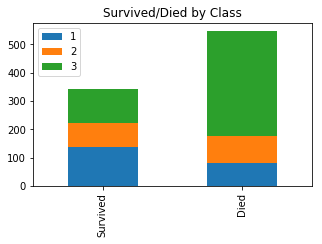

In [5]:
survived_class = dataset[dataset['Survived']==1]['Pclass'].value_counts()
dead_class = dataset[dataset['Survived']==0]['Pclass'].value_counts()
df_class = pd.DataFrame([survived_class,dead_class])
df_class.index = ['Survived','Died']
df_class.plot(kind='bar',stacked=True, figsize=(5,3), title="Survived/Died by Class")

Class1_survived= df_class.iloc[0,0]/df_class.iloc[:,0].sum()*100
Class2_survived = df_class.iloc[0,1]/df_class.iloc[:,1].sum()*100
Class3_survived = df_class.iloc[0,2]/df_class.iloc[:,2].sum()*100
print("Percentage of Class 1 that survived:" ,round(Class1_survived),"%")
print("Percentage of Class 2 that survived:" ,round(Class2_survived), "%")
print("Percentage of Class 3 that survived:" ,round(Class3_survived), "%")
# display table
from IPython.display import display
display(df_class)

Percentage of female that survived: 74.0 %
Percentage of male that survived: 19.0 %


,female,male
Survived,233,109
Died,81,468


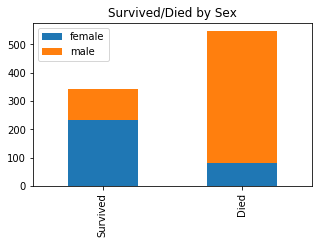

In [6]:
#-------------------Survived/Died by SEX------------------------------------
   
Survived = dataset[dataset.Survived == 1]['Sex'].value_counts()
Died = dataset[dataset.Survived == 0]['Sex'].value_counts()
df_sex = pd.DataFrame([Survived , Died])
df_sex.index = ['Survived','Died']
df_sex.plot(kind='bar',stacked=True, figsize=(5,3), title="Survived/Died by Sex")


female_survived= df_sex.female[0]/df_sex.female.sum()*100
male_survived = df_sex.male[0]/df_sex.male.sum()*100
print("Percentage of female that survived:" ,round(female_survived), "%")
print("Percentage of male that survived:" ,round(male_survived), "%")

# display table
from IPython.display import display
display(df_sex) 

Percentage of Embark S that survived: 34.0 %
Percentage of Embark C that survived: 55.0 %
Percentage of Embark Q that survived: 39.0 %


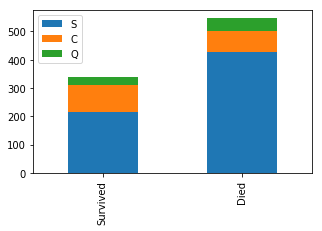

In [7]:
#-------------------- Survived/Died by Embarked ----------------------------

survived_embark = dataset[dataset['Survived']==1]['Embarked'].value_counts()
dead_embark = dataset[dataset['Survived']==0]['Embarked'].value_counts()
df_embark = pd.DataFrame([survived_embark,dead_embark])
df_embark.index = ['Survived','Died']
df_embark.plot(kind='bar',stacked=True, figsize=(5,3))

Embark_S= df_embark.iloc[0,0]/df_embark.iloc[:,0].sum()*100
Embark_C = df_embark.iloc[0,1]/df_embark.iloc[:,1].sum()*100
Embark_Q = df_embark.iloc[0,2]/df_embark.iloc[:,2].sum()*100
print("Percentage of Embark S that survived:", round(Embark_S), "%")
print("Percentage of Embark C that survived:" ,round(Embark_C), "%")
print("Percentage of Embark Q that survived:" ,round(Embark_Q), "%")


In [8]:
from IPython.display import display
display(df_embark)

,S,C,Q
Survived,217,93,30
Died,427,75,47


In [9]:
X = dataset.drop(['PassengerId','Cabin','Ticket','Fare', 'Parch', 'SibSp'], axis=1)
y = X.Survived                       # vector of labels (dependent variable)
X=X.drop(['Survived'], axis=1)       # remove the dependent variable from the dataframe X

X.head(20)


,Pclass,Name,Sex,Age,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,C
2,3,"Heikkinen, Miss. Laina",female,26.0,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,S
4,3,"Allen, Mr. William Henry",male,35.0,S
5,3,"Moran, Mr. James",male,NaN,Q
6,1,"McCarthy, Mr. Timothy J",male,54.0,S
7,3,"Palsson, Master. Gosta Leonard",male,2.0,S
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,S
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,C


In [10]:
# ----------------- Encoding categorical data -------------------------

# encode "Sex"
from sklearn.preprocessing import LabelEncoder
labelEncoder_X = LabelEncoder()
X.Sex=labelEncoder_X.fit_transform(X.Sex)

In [11]:
# encode "Embarked"
# number of null values in embarked:
print ('Number of null values in Embarked:', sum(X.Embarked.isnull()))

Number of null values in Embarked: 2


In [12]:
# fill the two values with one of the options (S, C or Q)
row_index = X.Embarked.isnull()
X.loc[row_index,'Embarked']='S' 

Embarked  = pd.get_dummies(  X.Embarked , prefix='Embarked'  )
X = X.drop(['Embarked'], axis=1)
X= pd.concat([X, Embarked], axis=1)  
# we should drop one of the columns
X = X.drop(['Embarked_S'], axis=1)

X.head()

,Pclass,Name,Sex,Age,Embarked_C,Embarked_Q
0,3,"Braund, Mr. Owen Harris",1,22.0,0,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0
2,3,"Heikkinen, Miss. Laina",0,26.0,0,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,0,0
4,3,"Allen, Mr. William Henry",1,35.0,0,0


In [13]:
X=X.drop(["Name"],axis=1)
X.head()

,Pclass,Sex,Age,Embarked_C,Embarked_Q
0,3,1,22.0,0,0
1,1,0,38.0,1,0
2,3,0,26.0,0,0
3,1,0,35.0,0,0
4,3,1,35.0,0,0


In [14]:
X.isnull().sum()

Pclass          0
Sex             0
Age           177
Embarked_C      0
Embarked_Q      0
dtype: int64

In [15]:
X.describe()

,Pclass,Sex,Age,Embarked_C,Embarked_Q
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,2.308642,0.647587,29.699118,0.188552,0.086420
std,0.836071,0.477990,14.526497,0.391372,0.281141
min,1.000000,0.000000,0.420000,0.000000,0.000000
25%,2.000000,0.000000,20.125000,0.000000,0.000000
50%,3.000000,1.000000,28.000000,0.000000,0.000000
75%,3.000000,1.000000,38.000000,0.000000,0.000000
max,3.000000,1.000000,80.000000,1.000000,1.000000


In [16]:
X.fillna(value=30,inplace=True)

In [17]:
X.isnull().sum()

Pclass        0
Sex           0
Age           0
Embarked_C    0
Embarked_Q    0
dtype: int64

# by using  kernel='rbf'

In [18]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator = classifier, X=X , y=y , cv = 10)
print("SVM:\n Accuracy:", accuracy.mean(), "+/-", accuracy.std(),"\n")

SVM:
 Accuracy: 0.7890327431619566 +/- 0.03891586126680063 



# by using kernel='poly'

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [22]:
from sklearn.svm import SVC
model=SVC(gamma=0.01,C=10,kernel='poly')
model.fit(x_train,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0], dtype=int64)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
test_score=accuracy_score(y_pred,y_test)
print('Accuracy on the testing subset: {:.3f}'.format(test_score))
train_score=model.score(x_train,y_train)
print('Accuracy on the training subset: {:.3f}'.format(train_score))

Accuracy on the testing subset: 0.844
Accuracy on the training subset: 0.801


In [25]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df.head()

,Actual,Predicted
590,0,0
131,0,0
628,0,0
195,1,1
230,1,1


In [26]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[105  12]
 [ 16  46]]


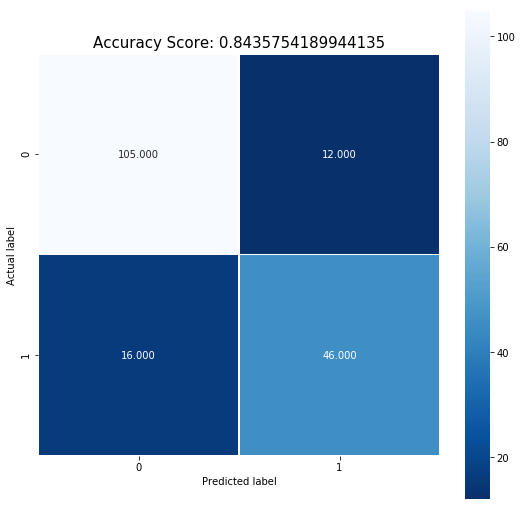

In [29]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Accuracy Score: {0}'.format(test_score)
plt.title(title, size = 15);

In [30]:
print("Classification Report")
clr=classification_report(y_test, y_pred, labels=[1, 0])
print(clr)

Classification Report
             precision    recall  f1-score   support

          1       0.79      0.74      0.77        62
          0       0.87      0.90      0.88       117

avg / total       0.84      0.84      0.84       179



In [31]:
print("Classification report for classifier %s:\n%s\n"
      % (clr, classification_report(y_test, y_pred)))

Classification report for classifier              precision    recall  f1-score   support

          1       0.79      0.74      0.77        62
          0       0.87      0.90      0.88       117

avg / total       0.84      0.84      0.84       179
:
             precision    recall  f1-score   support

          0       0.87      0.90      0.88       117
          1       0.79      0.74      0.77        62

avg / total       0.84      0.84      0.84       179


